In [254]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

random.seed(42)
np.random.seed(42)

In [ ]:
#Ниже ответьте на вопрос "Для чего фиксируем сиды в домашках?"

In [10]:
print("сид присваивается целочисленное значение, чтобы гарантировать воспроизводимость результатов псевдослучайной генерации. При повторном использовании начального значения одна и та же последовательность должна воспроизводиться от запуска к запуску, пока не запущено несколько потоков. Воспроизводимость — очень важная концепция, которая гарантирует, что любой, кто повторно запустит код, получит точно такие же результаты.")

сид присваивается целочисленное значение, чтобы гарантировать воспроизводимость результатов псевдослучайной генерации. При повторном использовании начального значения одна и та же последовательность должна воспроизводиться от запуска к запуску, пока не запущено несколько потоков. Воспроизводимость — очень важная концепция, которая гарантирует, что любой, кто повторно запустит код, получит точно такие же результаты.


In [255]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)
     

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


In [12]:
#Отобразите 10 случайных строк тренировочного датасета
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


In [13]:
#Отобразите первые 5 и последние 5 объектов тестового датасета
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [14]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [95]:
#Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста.
df_train.describe(include = "all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [96]:
df_test.describe(include = "all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [93]:
#Посмотрите, есть ли в датасете пропуски.
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   float64
 9   engine         6797 non-null   float64
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 711.0+ KB
None


In [97]:
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB
None


In [98]:
#Если есть, то в каких колонках?
print('В обоих сетах пропуски есть в колонках mileage, engine, max_power, torque, seats')

В обоих сетах пропуски есть в колонках mileage, engine, max_power, torque, seats


In [127]:
#Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько?
df_train.duplicated(subset=df_train.columns.difference(['selling_price'])).sum()

1159

In [128]:
#Отобразите такие объекты
dupl = df_train[df_train.duplicated(subset=df_train.columns.difference(['selling_price']))]
print(dupl)

                                          name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner  mileage  \
254       35000  Petrol  Individual       Manual   First Owner    18.90 

In [256]:
#Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются,/то оставьте первую строку по этому автомобилю
df_train = df_train.drop_duplicates(subset=df_train.columns.difference(['selling_price']), keep = 'first')

In [257]:
assert df_train.shape == (5840, 13)

In [258]:
#Чтоб все было по красоте, обновите индексы строк таким образом, чтобы они шли от 0 без пропусков
df_train = df_train.reset_index()
del df_train['index']
df_train.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0


In [260]:
#убрать единицы измерения для признаков ``mileage, engine, max_power``. * кастануть эти столбцы столбцы к ``float``. * удалить столбец ``torque``
import re
df_train['mileage'] = df_train['mileage'].replace(r'[^\d\.]', '', regex=True).astype(float)
df_train['engine'] = df_train['engine'].replace(r'[^\d\.]', '', regex=True).astype(float)
df_train['max_power'] = df_train['max_power'].replace(r'[^\d\.]', '', regex=True).replace(r'^\s*$', np.nan, regex=True).astype(float)
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3746,Ford Figo Aspire 1.2 Ti-VCT Trend,2018,590000,15000,Petrol,Individual,Manual,First Owner,18.16,1196.0,86.80,112Nm@ 4000rpm,5.0
3839,Tata Tiago 1.2 Revotron XZ WO Alloy,2017,450000,30000,Petrol,Individual,Manual,First Owner,23.84,1199.0,84.00,114Nm@ 3500rpm,5.0
4749,Tata Tiago NRG Petrol AMT,2019,520000,2560,Petrol,Individual,Automatic,First Owner,24.00,1199.0,83.81,114Nm@ 3500rpm,5.0
4048,Audi A4 2.0 TDI 177 Bhp Premium Plus,2013,1200000,110000,Diesel,Individual,Automatic,First Owner,17.11,1968.0,174.33,380Nm@ 1750-2500rpm,5.0
3996,Hyundai Verna CRDi SX,2010,190000,90000,Diesel,Individual,Manual,Second Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0
160,Volkswagen Ameo 1.0 MPI Trendline,2019,480000,13000,Petrol,Individual,Manual,First Owner,19.44,999.0,75.00,95Nm@ 3000-4300rpm,5.0
830,Tata Indica V2 DLG TC,2008,175000,120000,Diesel,Individual,Manual,Third Owner,16.80,1405.0,68.00,"13@ 2,500(kgm@ rpm)",5.0
4331,Honda City i DTEC S,2015,615000,120000,Diesel,Individual,Manual,Second Owner,26.00,1498.0,98.60,200Nm@ 1750rpm,5.0
3034,Hyundai Grand i10 Asta,2014,400000,40000,Petrol,Individual,Manual,Second Owner,18.90,1197.0,82.00,114Nm@ 4000rpm,5.0
5496,Maruti Ignis Zeta,2017,525000,29000,Petrol,Dealer,Manual,First Owner,20.89,1197.0,81.80,113Nm@ 4200rpm,5.0


In [261]:
df_test['mileage'] = df_test['mileage'].replace(r'[^\d\.]', '', regex=True).astype(float)
df_test['engine'] = df_test['engine'].replace(r'[^\d\.]', '', regex=True).astype(float)
df_test['max_power'] = df_test['max_power'].replace(r'[^\d\.]', '', regex=True).replace(r'^\s*$', np.nan, regex=True).astype(float)
df_test.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
37,Tata Indica Vista Quadrajet VX,2012,200000,90000,Diesel,Individual,Manual,First Owner,22.30,1248.0,74.00,190Nm@ 1750-3000rpm,5.0
531,Maruti Swift Dzire LDI,2016,425000,120000,Diesel,Individual,Manual,Third Owner,26.59,1248.0,74.00,190Nm@ 2000rpm,5.0
925,Maruti Wagon R VXI BS IV,2017,440000,35000,Petrol,Individual,Manual,First Owner,20.51,998.0,67.04,90Nm@ 3500rpm,5.0
405,Tata Nano Cx BSIV,2010,55000,50000,Petrol,Individual,Manual,Third Owner,26.00,624.0,35.00,"48@ 3,000+/-500(NM@ rpm)",4.0
377,Honda City i DTec V,2014,560000,72000,Diesel,Dealer,Manual,First Owner,26.00,1498.0,98.60,200Nm@ 1750rpm,5.0
873,Mahindra TUV 300 T8,2016,700000,30000,Diesel,Individual,Manual,First Owner,18.49,1493.0,100.00,240Nm@ 1600-2800rpm,7.0
653,Jeep Compass 2.0 Limited 4X4,2017,1511000,32000,Diesel,Individual,Manual,First Owner,16.30,1956.0,170.00,350Nm@ 1750-2500rpm,5.0
8,Maruti Alto LX,2011,140000,72000,Petrol,Individual,Manual,Second Owner,19.70,796.0,46.30,62Nm@ 3000rpm,5.0
662,Maruti Swift VDI Optional,2017,693000,58559,Diesel,Dealer,Manual,First Owner,25.20,1248.0,74.00,190Nm@ 2000rpm,5.0
121,Hyundai Xcent 1.2 CRDi SX Option,2017,620000,31000,Diesel,Individual,Manual,First Owner,25.40,1186.0,73.97,190.25nm@ 1750-2250rpm,5.0


In [230]:
#Вместо удаления признак torque разделите на два: собственно torque и max_torque_rpm. Учтите единицы измерения. Они разные ☹

In [262]:
df_train = df_train.rename(columns={'torque': 'torque_init'})
df_train[['torque','max_torque_rpm']] = df_train['torque_init'].str.split(pat = '@|at', n = 1, expand = True)
# df_train[['torque_init', 'torque','max_torque_rpm']].sample(5)

df_train['torque'] = df_train['torque'].replace(r'[^\d\.]', '', regex=True).astype(float)
# df_train[['torque_init','torque']][(df_train['torque_init'].str.contains(r'\(') == True) & (df_train['torque_init'].str.contains('rpm') == False)]
df_train['max_torque_rpm'] = df_train['max_torque_rpm'].\
                            replace(' ', '', regex=True).\
                            replace('(?i)rpm', '', regex = True).\
                            replace(',', '', regex = True).\
                            replace(r'(?i)kgm@', '', regex = True).\
                            replace(r'(?i)nm@', '', regex = True).\
                            replace(r'\(', '', regex = True).\
                            replace(r'\)', '', regex = True)
# df_train[['torque_init','max_torque_rpm']]\
#     [(df_train['max_torque_rpm'].replace(r'[\d\.-]', '', regex=True) != '') & (df_train['torque_init'].notnull() == True)]


def torque_conv_train (t_init, t):
    df_train[t]= np.where(df_train[t_init].str.contains('(?i)kgm') == True,
                          df_train[t] * 9.80665,
                          df_train[t]
                          )
    return df_train
    
df_train = torque_conv_train('torque_init','torque')
# df_train[['torque_init','torque','max_torque_rpm']].sample(5)
df_train[['torque_init','torque','max_torque_rpm']][df_train['torque_init'].str.contains(r'(?i)kgm', regex = True) == True].sample(5)

df_train = df_train.drop(columns=['torque_init'])
df_train.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm
5445,Maruti Swift Dzire ZDI,2019,802999,24000,Diesel,Individual,Manual,First Owner,28.4,1248.0,74.02,5.0,190.0,2000
10,Maruti Zen LX,2005,92000,100000,Petrol,Individual,Manual,Second Owner,17.3,993.0,60.00,5.0,78.0,4500
2314,Honda City 1.5 E MT,2009,350000,35000,Petrol,Individual,Manual,First Owner,17.0,1497.0,118.00,5.0,146.0,4800
898,Toyota Etios Liva GD,2012,300000,80000,Diesel,Individual,Manual,First Owner,NaN,NaN,NaN,NaN,NaN,NaN
4246,Hyundai Grand i10 CRDi Magna,2015,350000,80000,Diesel,Individual,Manual,Third Owner,24.0,1120.0,70.00,5.0,160.0,1500-2750


In [263]:
df_test = df_test.rename(columns={'torque': 'torque_init'})
df_test[['torque','max_torque_rpm']] = df_test['torque_init'].str.split(pat = '@|at', n = 1, expand = True)
df_test[['torque_init', 'torque','max_torque_rpm']].sample(5)
df_test['torque'] = df_test['torque'].replace(r'[^\d\.]', '', regex=True).astype(float)
# df_test[['torque_init','torque']][(df_test['torque_init'].str.contains(r'\(') == True) & (df_test['torque_init'].str.contains('rpm') == False)]
df_test.at[793,'torque'] = 110
df_test['max_torque_rpm'] = df_test['max_torque_rpm'].\
                            replace(' ', '', regex=True).\
                            replace('(?i)rpm', '', regex = True).\
                            replace(',', '', regex = True).\
                            replace(r'(?i)kgm@', '', regex = True).\
                            replace(r'(?i)nm@', '', regex = True).\
                            replace(r'\(', '', regex = True).\
                            replace(r'\)', '', regex = True)
# df_test[['torque_init','max_torque_rpm']]\
#     [(df_test['max_torque_rpm'].replace(r'[\d\.-]', '', regex=True) != '') & (df_test['torque_init'].notnull() == True)]
def torque_conv_test (t_init, t):
    df_test[t]= np.where(df_test[t_init].str.contains('(?i)kgm') == True,
                         df_test[t] * 9.80665,
                         df_test[t]
                        )
    return df_test

df_test = torque_conv_test('torque_init','torque')
# df_test[['torque_init','torque','max_torque_rpm']].sample(5)
df_test[['torque_init','torque','max_torque_rpm']][df_test['torque_init'].str.contains(r'(?i)kgm', regex = True) == True].sample(5)

df_test = df_test.drop(columns=['torque_init'])
df_test.sample(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,torque,max_torque_rpm
494,Renault Scala Diesel RxZ,2013,434999,120000,Diesel,Individual,Manual,First Owner,21.64,1461.0,84.80,5.0,200.00,2000
129,Tata Indigo eCS LE TDI BSIII,2010,135000,148000,Diesel,Individual,Manual,Second Owner,19.09,1396.0,69.00,5.0,135.00,2500
222,Maruti Alto K10 LXI,2014,229999,60000,Petrol,Individual,Manual,Second Owner,20.92,998.0,67.10,5.0,90.00,3500
430,Hyundai Xcent 1.2 VTVT E,2019,500000,60000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0,113.75,4000
925,Maruti Wagon R VXI BS IV,2017,440000,35000,Petrol,Individual,Manual,First Owner,20.51,998.0,67.04,5.0,90.00,3500


In [264]:
#Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось
df_train[['year', 'selling_price', 'km_driven','mileage', 'engine', 'max_power', 'seats','torque']] = df_train[['year', 'selling_price', 'km_driven','mileage', 'engine', 'max_power', 'seats', 'torque']].fillna(df_train[['year', 'selling_price', 'km_driven','mileage', 'engine', 'max_power', 'seats','torque']].median())
df_test[['year', 'selling_price', 'km_driven','mileage', 'engine', 'max_power', 'seats','torque']] = df_train[['year', 'selling_price', 'km_driven','mileage', 'engine', 'max_power', 'seats','torque']].fillna(df_train[['year', 'selling_price', 'km_driven','mileage', 'engine', 'max_power', 'seats','torque']].median())
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   float64
 10  max_power       5840 non-null   float64
 11  seats           5840 non-null   float64
 12  torque          5840 non-null   float64
 13  max_torque_rpm  5642 non-null   object 
dtypes: float64(5), int64(3), object(6)
memory usage: 638.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 # 

In [265]:
#Теперь, когда не осталось пропусков, можно преобразовать столбцы к более подходящим типам (engnine и seats к int)
df_train['engine'] = df_train['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [ ]:
#Ниже ответьте, почему (хоть мы этого и не делаем) seats, возможно, лучше сделать переменной категориальной, а не целочисленной.
print('признак seats скорее качественный, чем количественный. Хоть и можно отсортировать признак по возрастанию/убыванию, найти среднее значение, практической пользы эта информация не принесет')

In [ ]:
#Посторойте попарные распределения всех числовых признаков для трейна.

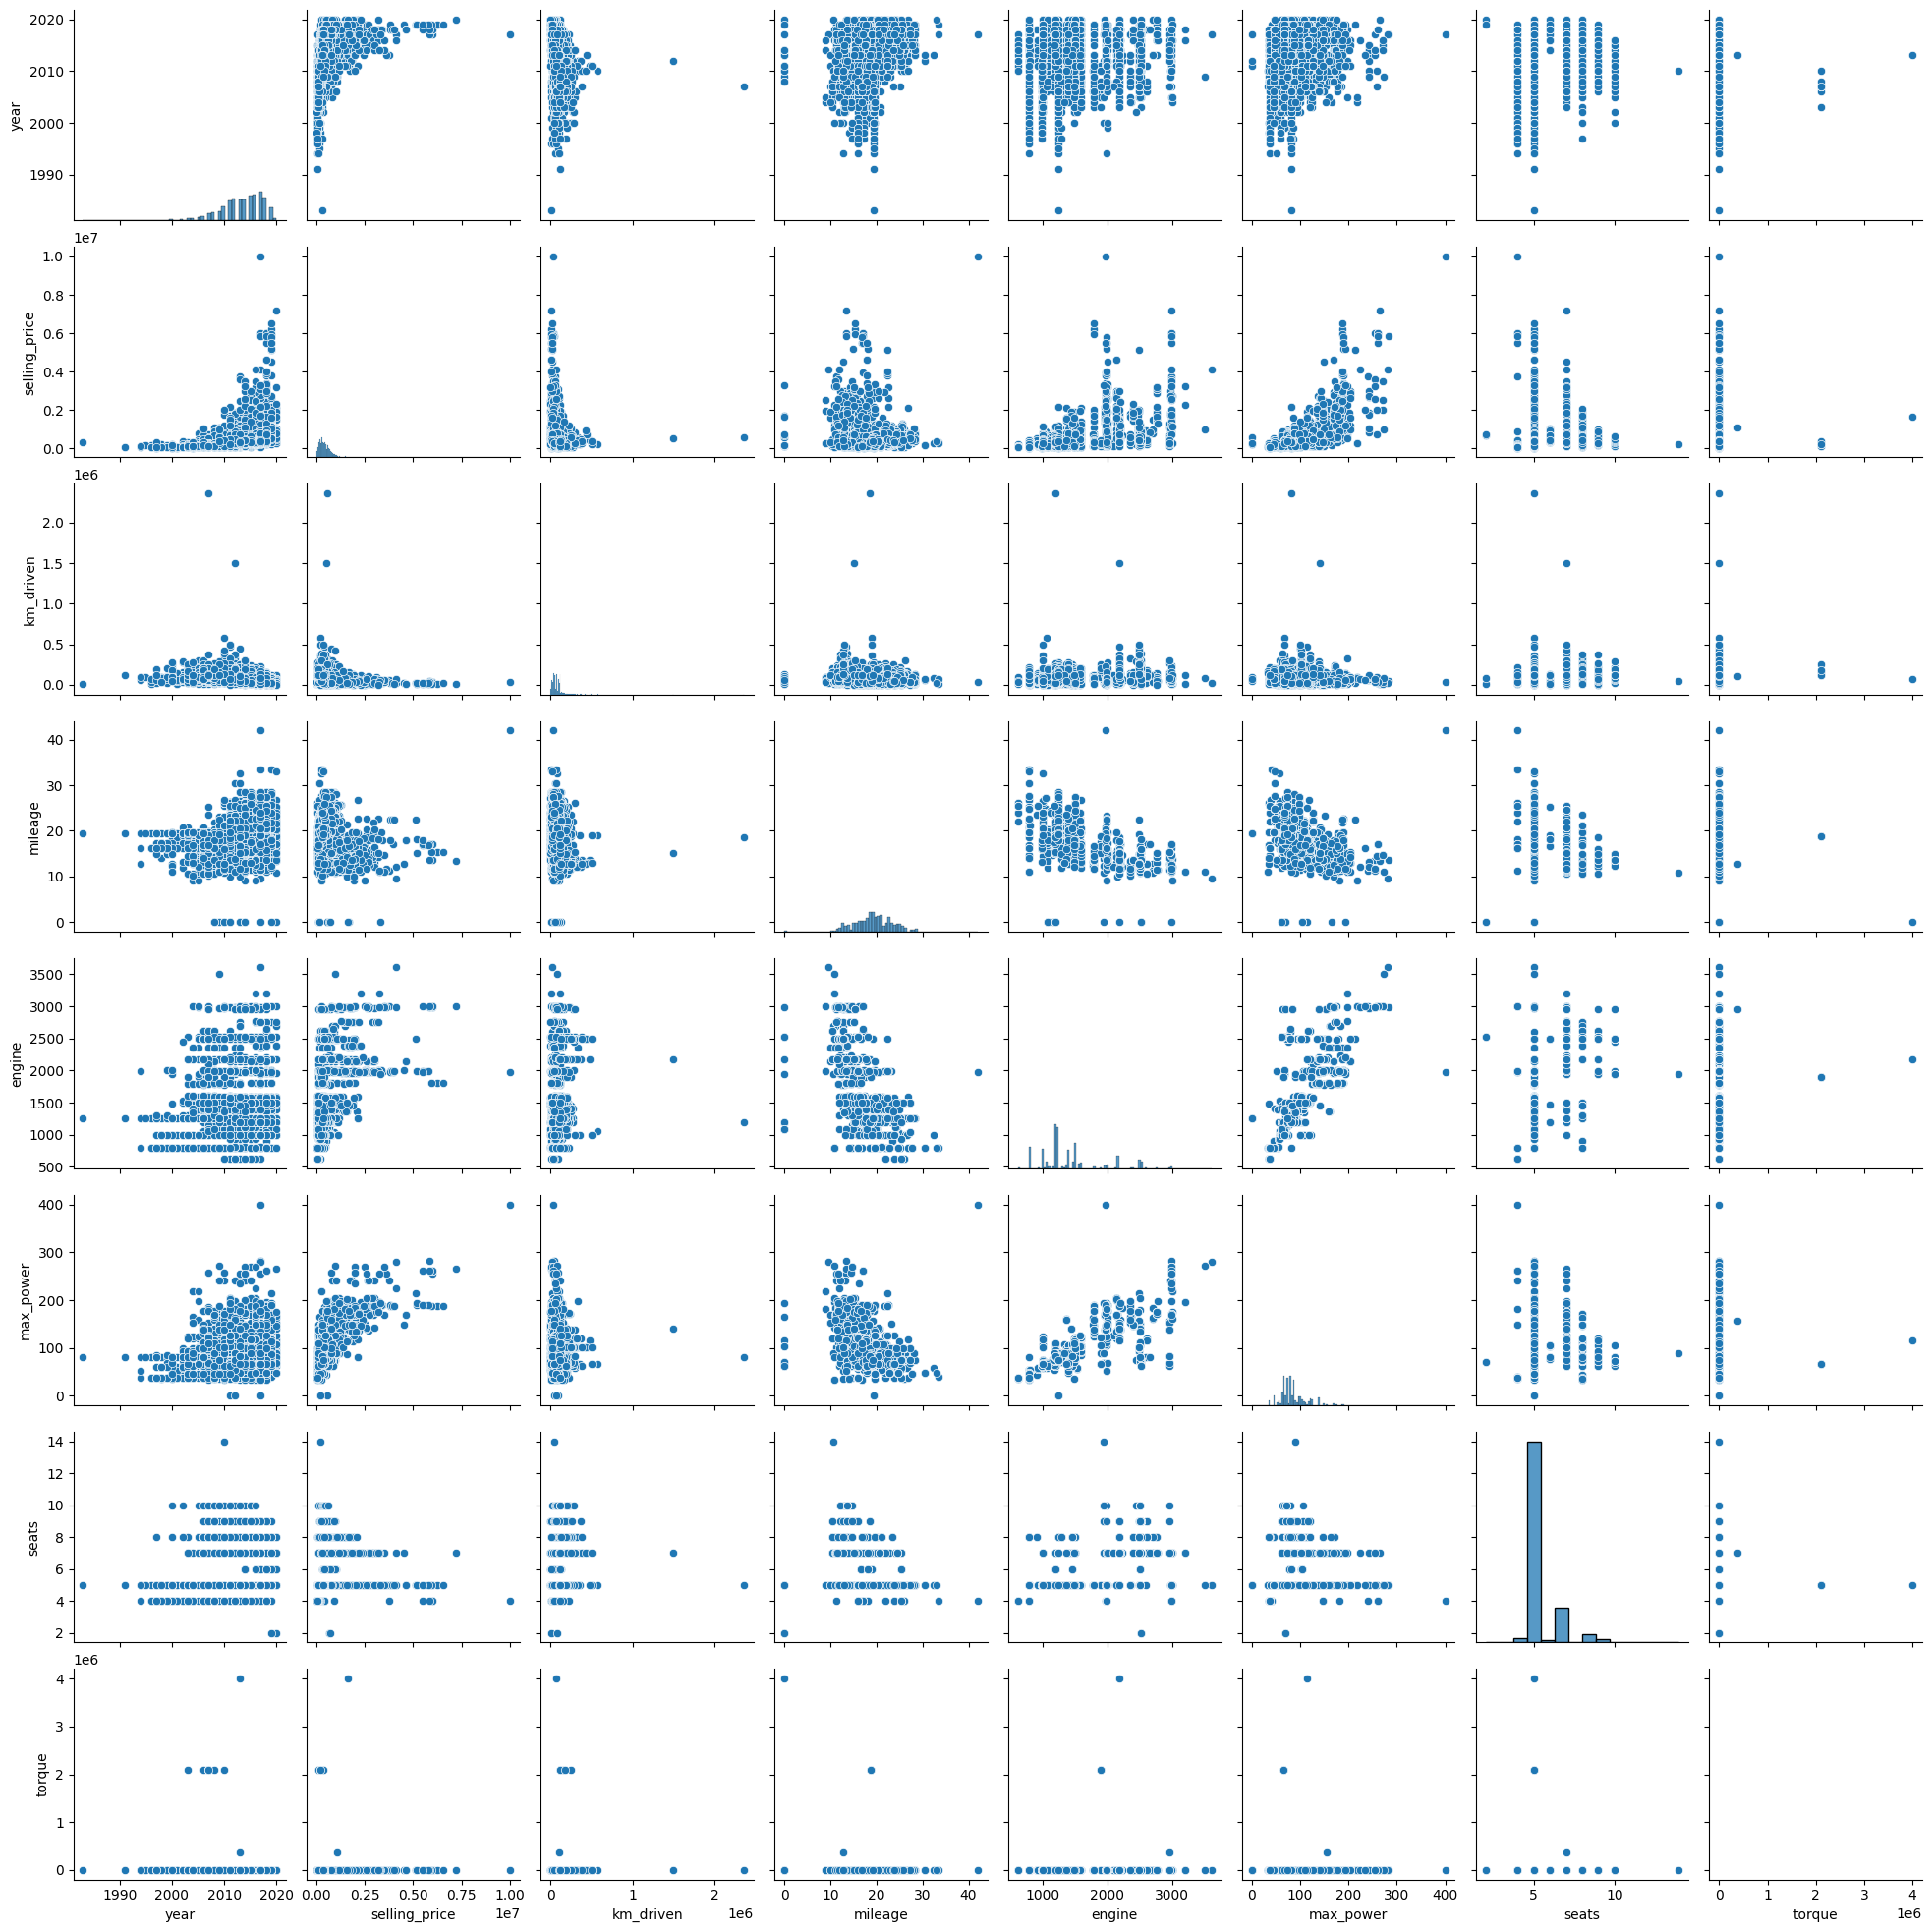

In [93]:
sns.pairplot(df_train)

In [97]:
#Что можно сказать о связи предикторов с целевой переменной?
#наиболее тесная прямопропорциональная связь у целевой переменной с предикторами 'year', 'engine', 'max_power' - при увеличении предиктора увеличивается целевая переменная;
#обратнопропорциональная связь с предиктором 'km_driven'.

#А о корреляциях признаков?
#наиболее тесня свзяь у пар признаков 'max_power' и 'engine', 'mileage' и 'engine' (связь обратнопропорциональна).


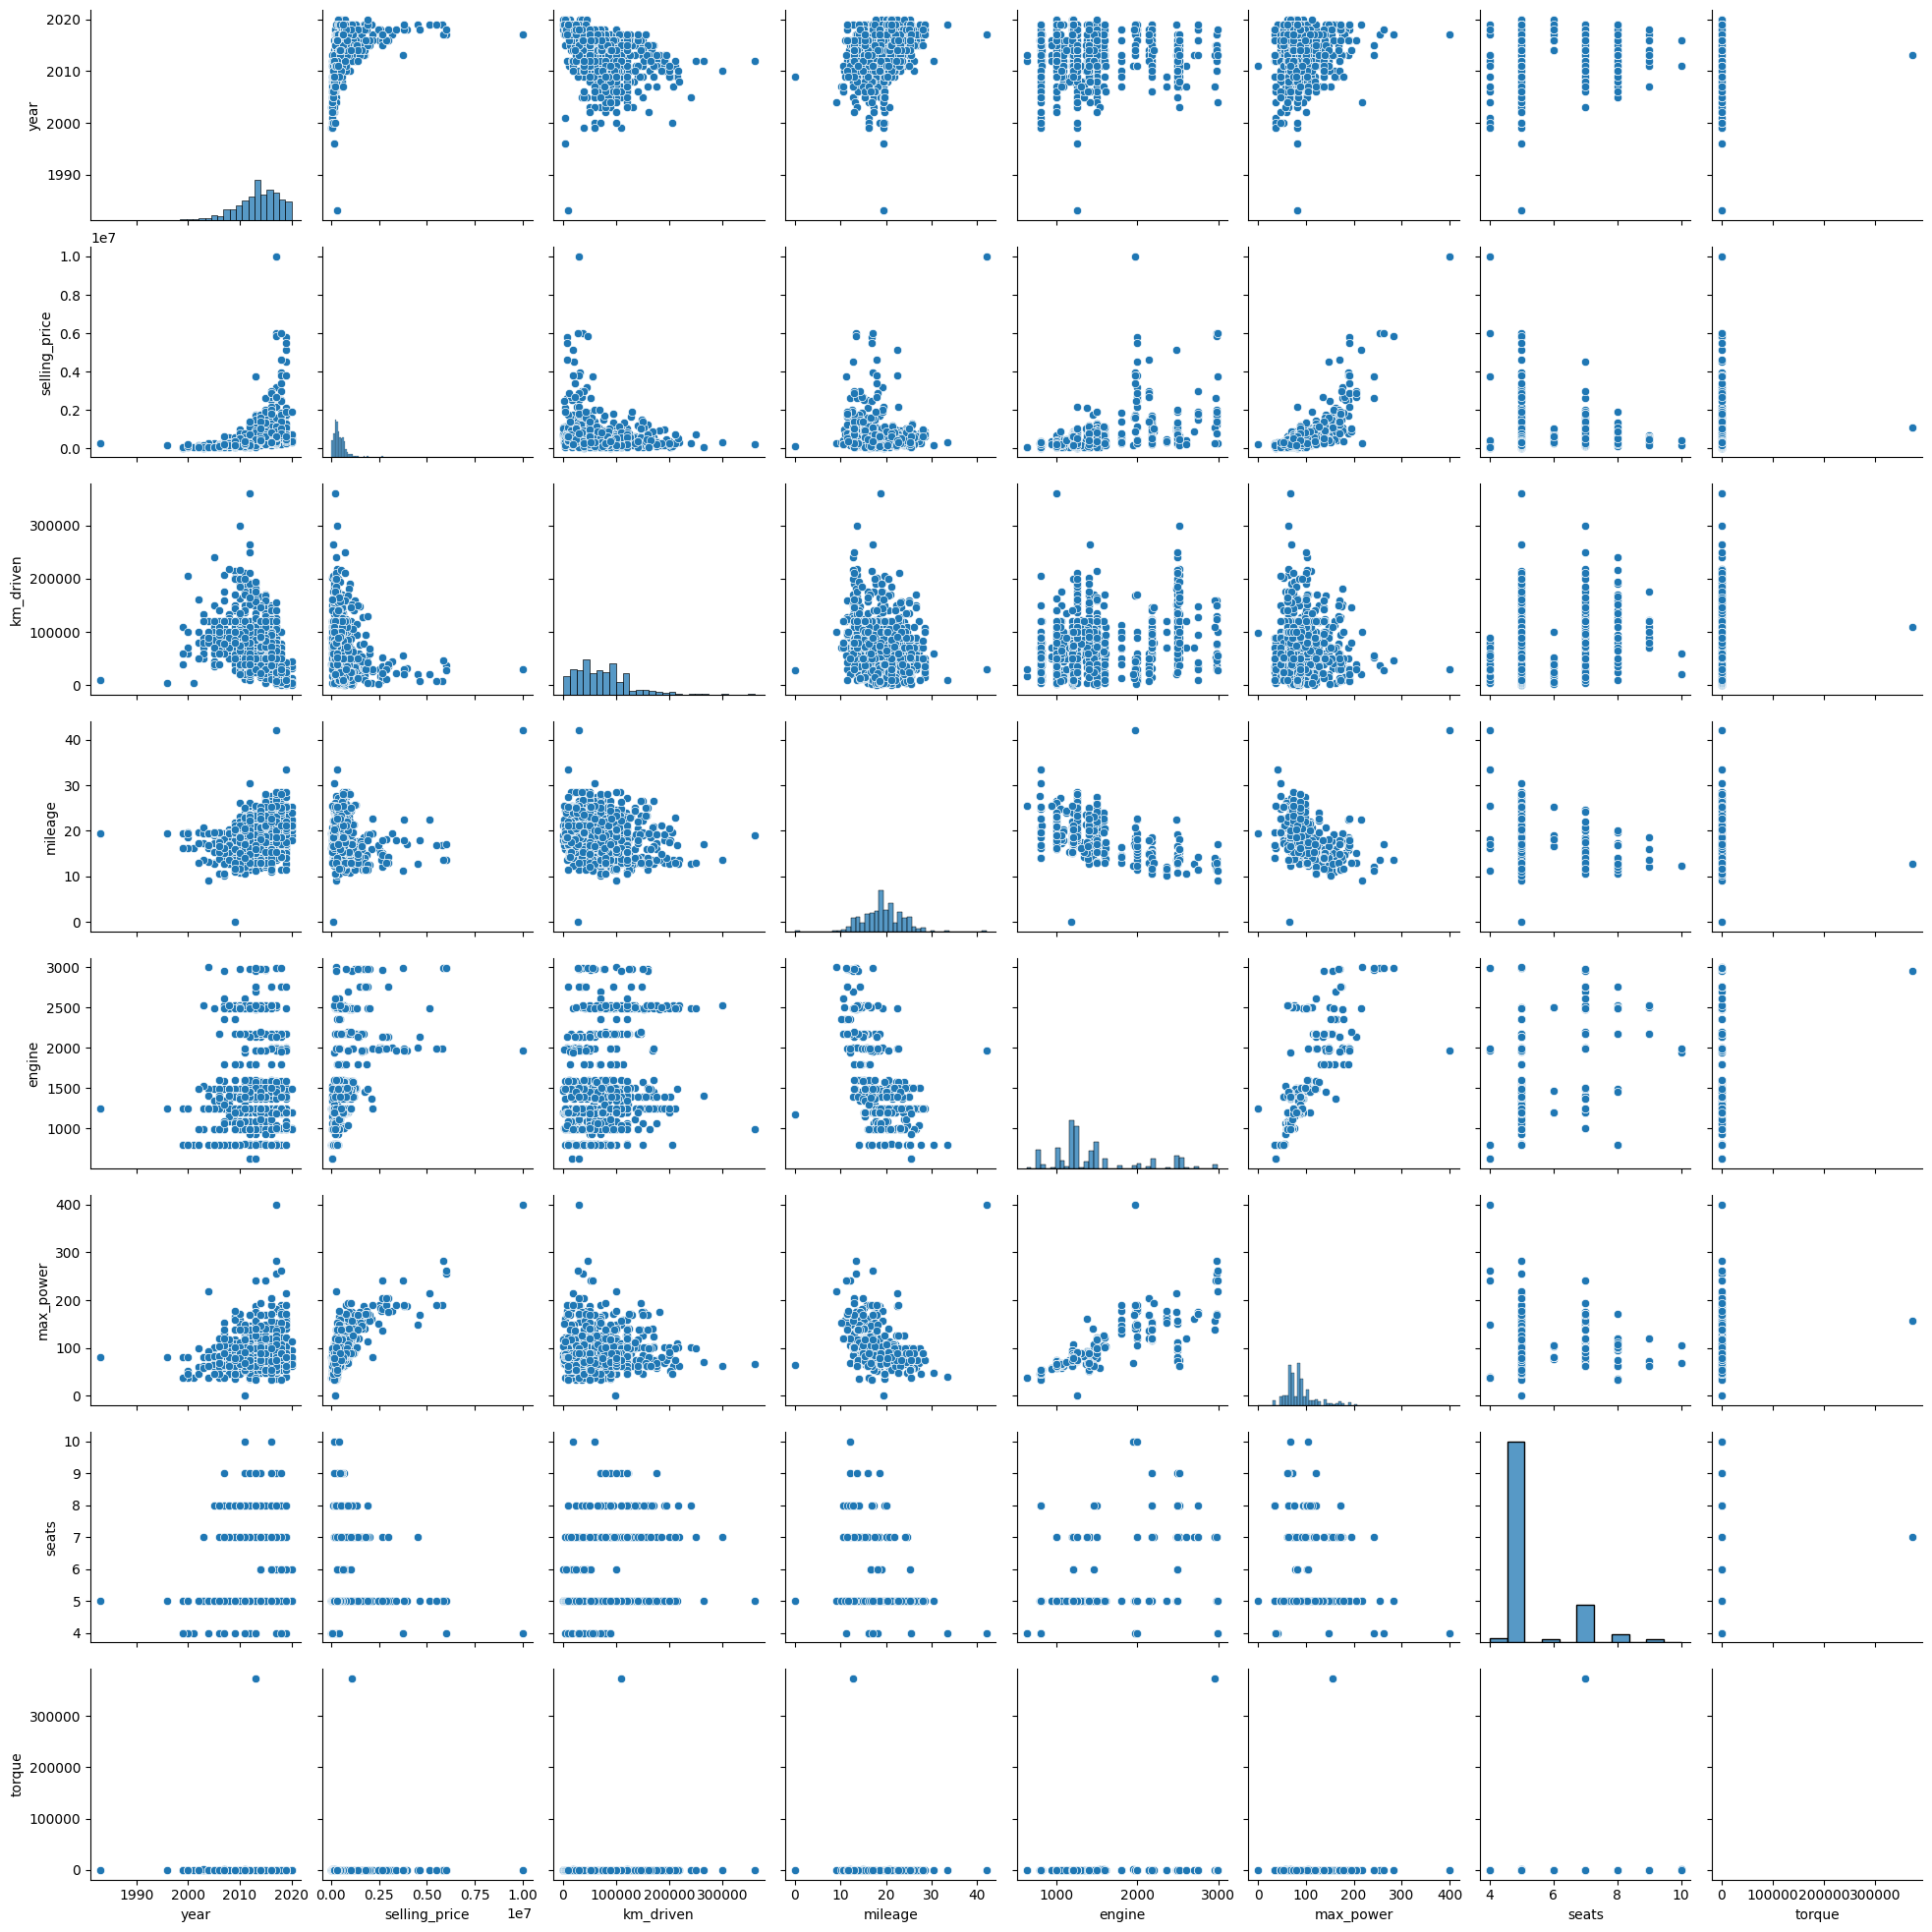

In [95]:
sns.pairplot(df_test)

In [250]:
#Похожими ли оказались совокупности при разделении на трейн и тест?
#похожи по перечисленным выше признакам

In [ ]:
#Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок

<Axes: >

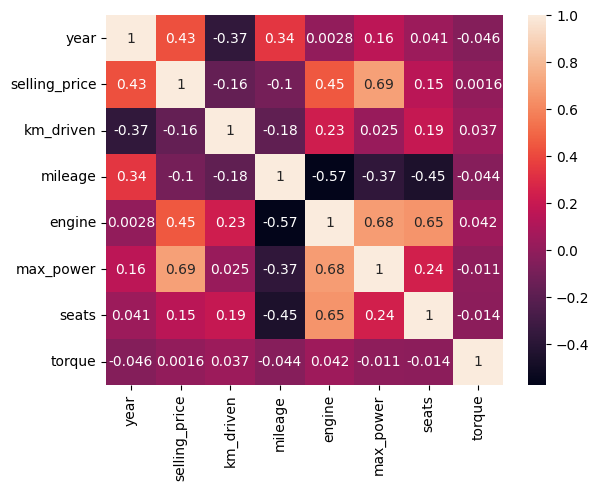

In [41]:
sns.heatmap(df_train[['year', 'selling_price','km_driven','mileage','engine','max_power','seats','torque']].corr(), annot = True)

In [ ]:
#Какие 2 признака наименее скоррелированы между собой?
#'year' и 'km_driven'

#Между какими наблюдается довольно сильная положительная линейная зависимость?
#'selling_price' и 'max_power', 'engine' и 'max_power'

#Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.
#верно, тк зависимость обратно пропорциональна, корреляция отрациальна, что говорит о том, что, по мере уменьшения одного признака увеличивается другой

<Axes: xlabel='max_power', ylabel='selling_price'>

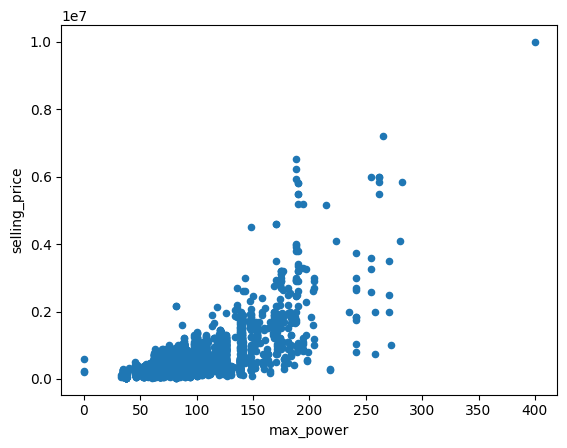

In [98]:
#Отобразите диаграммe рассеяния для наиболее скореллированной пары признаков (на трейне)
df_train.plot.scatter(x ='max_power', y ='selling_price')

<Axes: xlabel='year', ylabel='selling_price'>

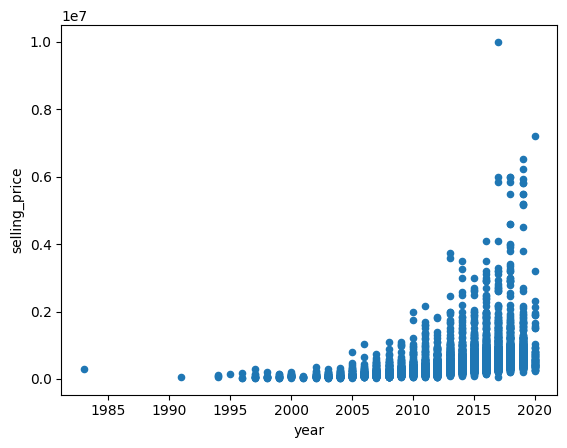

In [99]:
df_train.plot.scatter(x ='year', y ='selling_price')

In [100]:
#В переменные y_train и y_test запишите значения целевых переменных.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  seats           5840 non-null   float64
 12  torque          5840 non-null   float64
 13  max_torque_rpm  5642 non-null   object 
dtypes: float64(4), int64(4), object(6)
memory usage: 638.9+ KB


In [266]:
y_train = df_train['selling_price']
X_train = df_train.drop(df_train.columns[[0,2,4,5,6,7,13]], axis = 1)

In [267]:
assert X_train.shape == (5840, 7)

In [268]:
y_test = df_test['selling_price']
X_test = df_test.drop(df_test.columns[[0,2,4,5,6,7,13]], axis = 1)

In [269]:
assert X_test.shape == (1000, 7)

In [ ]:
#Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте  и MSE для трейна и для теста

In [270]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

In [271]:
model_lr = LinearRegression().fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

In [272]:
coeff_lr = model_lr.coef_
print('slope:', coeff_lr)

slope: [ 3.73240041e+04 -7.37968483e-01  7.33651835e+03  1.22044842e+02
  1.02426021e+04 -2.22897424e+04  1.27397857e-01]


In [273]:
MSE(y_test, pred_lr) ** 0.5

448664.9927132609

In [274]:
r2_score(y_test, pred_lr)

0.6112321076942128

In [190]:
from sklearn.preprocessing import StandardScaler

In [191]:
ss = StandardScaler()
scale_train = ss.fit_transform(X_train)
scale_test = ss.fit_transform(X_test)

In [192]:
print(scale_train)

[[ 0.13956959  1.19115249  0.995867   ... -0.43955049 -0.43441899
  -0.03626233]
 [ 0.13956959  0.76661943  0.42883018 ...  0.49351327 -0.43441899
  -0.03559359]
 [-0.83716668  0.88315792  0.8955065  ...  0.06617512 -0.43441899
  -0.03593165]
 ...
 [-0.10461448  0.60013588 -0.2335491  ... -0.15982101 -0.43441899
  -0.03711273]
 [-1.56971888  0.74997108 -0.66008122 ...  0.69833214 -0.43441899
  -0.03575677]
 [-1.08135075  0.76661943 -0.03282811 ... -0.44271128 -0.43441899
  -0.03626233]]


In [ ]:
#Какой признак оказался наиболее информативным в предсказании цены?

In [193]:
from sklearn.linear_model import Lasso
model_lasso = Lasso().fit(scale_train, y_train) # (alpha=1)
pred_lasso = model_lasso.predict(scale_test)
coeff_lasso = model_lasso.coef_
print('slope:', coeff_lasso)

slope: [152851.73234874 -44325.66876159  29238.75020751  59262.88471598
 324053.25718731 -21891.54278098  11429.47616358]


In [194]:
MSE(y_test, pred_lasso) ** 0.5

460581.84257907287

In [195]:
r2_score(y_test, pred_lasso)

0.5903059599866269

In [ ]:
#Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?

#не занулила, значит, все признаки имеют значение для построения модели

In [29]:
#Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии

In [196]:
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
alphas = np.logspace(-3, 5, 100)
# alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
params = [{"alpha": alphas}]

gs_cv_las = GridSearchCV(lasso, params, cv=10)
gs_cv_las.fit(scale_train, y_train)

scores = gs_cv_las.cv_results_["mean_test_score"]
scores_std = gs_cv_las.cv_results_["std_test_score"]

print(gs_cv_las.best_params_)
print(gs_cv_las.best_score_)

{'alpha': 27185.882427329456}
0.5750234947121456


In [197]:
model_lasso_v2 = Lasso(alpha=27185.882427329456).fit(scale_train, y_train)
pred_lasso_v2 = model_lasso_v2.predict(scale_test)
coeff_lasso_v2 = model_lasso_v2.coef_
print('slope:', coeff_lasso_v2)

print(MSE(y_test, pred_lasso_v2) ** 0.5)
print(r2_score(y_test, pred_lasso_v2))

slope: [145543.39635977 -15260.14490466      0.              0.
 321282.64842554     -0.              0.        ]
478704.6235017255
0.5574307204658829


In [ ]:
#Сколько грид-сёрчу пришлось обучать моделей?
# 1000
#Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?
# занулились веса mileage, engine, seats, torque

In [ ]:
#Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для ElasticNet-регрессии

In [198]:
from sklearn.linear_model import ElasticNet
elnet = ElasticNet()
# alphas = np.logspace(-3, 1, 10)
alphas = [0.001,0.01,0.1,1]
iters = [100,1000,10000]
params = [{"alpha": alphas, "max_iter": iters}]

gs_cv_el = GridSearchCV(elnet, params, cv=10)
gs_cv_el.fit(scale_train, y_train)

scores = gs_cv_el.cv_results_["mean_test_score"]
scores_std = gs_cv_el.cv_results_["std_test_score"]

print(gs_cv_el.best_params_)
print(gs_cv_el.best_score_)

{'alpha': 0.1, 'max_iter': 100}
0.5736644616122927


In [199]:
model_elneet = ElasticNet(alpha=0.1,max_iter=100).fit(scale_train, y_train)
pred_elnet = model_elneet.predict(scale_test)
coeff_elnet = model_elneet.coef_
print('slope:', coeff_elnet)

print(MSE(y_test, pred_elnet) ** 0.5)
print(r2_score(y_test, pred_elnet))

slope: [149700.53775749 -45603.34697478  26033.48743086  71866.73860529
 300329.84600162 -24202.8954101    9889.49492246]
467412.6971639787
0.5780635623484989


In [ ]:
#Какие гиперпараметры соответствуют лучшей из перебранных моделей?
# не совсем понимаю вопрос. Судя по MSE и R2 лучше всего отработала модель линейной регрессии.

In [65]:
#Из df_train удалите столбцы с целевой переменной и названием автомобиля

In [342]:
X_train_cat = df_train.drop(df_train.columns[[0,2,13]], axis = 1)
X_test_cat = df_test.drop(df_test.columns[[0,2,13]], axis = 1)

In [325]:
#X_train_cat = X_train_cat.replace({'max_torque_rpm': {'-': '_'}}, regex=True)
#X_test_cat = X_test_cat.replace({'max_torque_rpm': {'-': '_'}}, regex=True)

In [344]:
assert X_train_cat.shape == (5840, 11)

In [345]:
X_train_cat.describe(include='object')

X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          5840 non-null   int64  
 1   km_driven     5840 non-null   int64  
 2   fuel          5840 non-null   object 
 3   seller_type   5840 non-null   object 
 4   transmission  5840 non-null   object 
 5   owner         5840 non-null   object 
 6   mileage       5840 non-null   float64
 7   engine        5840 non-null   int64  
 8   max_power     5840 non-null   float64
 9   seats         5840 non-null   float64
 10  torque        5840 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 502.0+ KB


In [ ]:
#Закодируйте категориалльные фичи и seats методом OneHot-кодирования

In [278]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

In [346]:
X_train_cat = pd.get_dummies(X_train_cat, columns = ['fuel','seller_type','transmission','owner'], drop_first = True, dtype=int)

In [347]:
X_test_cat = pd.get_dummies(X_test_cat, columns = ['fuel','seller_type','transmission','owner'], drop_first = True, dtype=int)

In [348]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

rid = Ridge()
# alphas = np.logspace(-3, 1, 10)
alphas = [0.001,0.01,0.1,1]
iters = [100,1000,10000]
params = [{"alpha": alphas, "max_iter": iters}]

gs_cv_rid = GridSearchCV(rid, params, cv=10)
gs_cv_rid.fit(X_train_cat, y_train)

print(gs_cv_rid.best_params_)
print(gs_cv_rid.best_score_)

{'alpha': 1, 'max_iter': 100}
0.6004018644336896


In [349]:
model_ridge = Ridge(alpha=1,max_iter=100).fit(X_train_cat, y_train)
pred_ridge = model_ridge.predict(X_test_cat)
coeff_ridge = model_ridge.coef_
print('slope:', coeff_ridge)

print(MSE(y_test, pred_ridge) ** 0.5)
print(r2_score(y_test, pred_ridge))

slope: [ 3.22138345e+04 -5.94020193e-01  6.13713044e+03  8.80172016e+01
  8.64463809e+03 -8.93764071e+03  8.56716590e-02  2.65292058e+04
  1.14237233e+05 -3.64443288e+04 -1.06728794e+05 -1.29659938e+05
 -3.04199175e+05 -4.82756785e+04 -6.05550737e+04  2.64097805e+06
 -4.98364596e+04]
499419.4969167731
0.5182996009609906


In [ ]:
#Feature Engineering

In [350]:
owner_cond_train = [
    (df_train['owner'] == 'First Owner'),
    (df_train['owner'] == 'Second Owner'),
    (df_train['owner'] == 'Third Owner'),
    (df_train['owner'] == 'Fourth & Above Owner'),
    (df_train['owner'] == 'Test Drive Car')
    ]
owner_val_train = [
    round(df_train['km_driven'],3),
    round(df_train['km_driven']/2,3),
    round(df_train['km_driven']/3,3),
    -1,
    -1
    ]
df_train['avg_km_driven'] = np.select(owner_cond_train, owner_val_train)

In [351]:
owner_cond_test = [
    (df_test['owner'] == 'First Owner'),
    (df_test['owner'] == 'Second Owner'),
    (df_test['owner'] == 'Third Owner'),
    (df_test['owner'] == 'Fourth & Above Owner'),
    (df_test['owner'] == 'Test Drive Car')
    ]
owner_val_test = [
    round(df_test['km_driven'],3),
    round(df_test['km_driven']/2,3),
    round(df_test['km_driven']/3,3),
    -1,
    -1
    ]
df_test['avg_km_driven'] = np.select(owner_cond_test, owner_val_test)

In [352]:
df_train['power_to_vol'] = round(df_train['max_power'] / df_train['engine'],3)
df_test['power_to_vol'] = round(df_test['max_power'] / df_test['engine'],3)

In [353]:
df_train['torque_to_power'] = round(df_train['torque'] / df_train['max_power'],3)
df_test['torque_to_power'] = round(df_test['torque'] / df_test['max_power'],3)

In [354]:
df_train['fuel_amt'] = round(df_train['km_driven'] * df_train['mileage'],3)
df_test['fuel_amt'] = round(df_test['km_driven'] * df_test['mileage'],3)

In [355]:
van_cond_train = [
    (df_train['seats'] <= 5),
    (df_train['seats'] >5)
    ]
van_val_train = [0,1]
df_train['van_ind'] = np.select(van_cond_train, van_val_train)

In [356]:
van_cond_test = [
    (df_test['seats'] <= 5),
    (df_test['seats'] >5)
    ]
van_val_test = [0,1]
df_test['van_ind'] = np.select(van_cond_test, van_val_test)

In [357]:
df_train['torque_to_power'] = df_train['torque_to_power'].replace([np.inf, -np.inf], -1)
df_train['power_to_vol'] = df_train['power_to_vol'].replace([np.inf, -np.inf], -1)
df_train['fuel_amt'] = df_train['fuel_amt'].replace([np.inf, -np.inf], -1)

In [358]:
df_test['torque_to_power'] = df_train['torque_to_power'].replace([np.inf, -np.inf], -1)
df_test['power_to_vol'] = df_train['power_to_vol'].replace([np.inf, -np.inf], -1)
df_test['fuel_amt'] = df_train['fuel_amt'].replace([np.inf, -np.inf], -1)

In [359]:
X_train_fe = df_train.drop(df_train.columns[[0,2,4,5,6,7,13]], axis = 1)
X_test_fe = df_test.drop(df_test.columns[[0,2,4,5,6,7,13]], axis = 1)

In [360]:
model_lr_v2 = LinearRegression().fit(X_train_fe, y_train)
pred_lr_v2 = model_lr_v2.predict(X_test_fe)

In [361]:
coeff_lr_v2 = model_lr_v2.coef_
print('slope:', coeff_lr_v2)

slope: [ 4.12750146e+04 -1.37766329e+00  4.54956487e+03 -3.93928453e+02
  1.87799693e+04 -2.51124479e+04  4.08027529e-01  2.58311506e-03
 -1.77239425e+07 -2.26091842e+01  3.43810586e-02  3.54487059e+04]


In [362]:
print(MSE(y_test, pred_lr_v2) ** 0.5)
print(r2_score(y_test, pred_lr_v2))

441492.32410583884
0.6235629729574383


In [ ]:
#MSE, R2 улучшились :)